In [7]:
# Cell 1: Imports & settings
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# plotting defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

# Paths
PROJECT_DIR = Path(r"F:\bike-sharing-demand")  # <- ensure this matches your local path PROJECT_DIR = Path(r"F:\bike-sharing-demand")
RAW_DIR = PROJECT_DIR / "data" / "raw"
PROCESSED_DIR = PROJECT_DIR / "data" / "processed"
FIG_DIR = PROJECT_DIR / "reports" / "figures"

# Create output directories if missing
for d in (PROCESSED_DIR, FIG_DIR):
    d.mkdir(parents=True, exist_ok=True)

# Files
TRAIN_CSV = RAW_DIR / "train.csv"
TEST_CSV = RAW_DIR / "test.csv"
SAMPLE_SUB_CSV = RAW_DIR / "SampleSubmission.csv"


In [8]:
# Cell 2: Load Data
train = pd.read_csv(TRAIN_CSV)
test = pd.read_csv(TEST_CSV)

print("✅ Loaded:")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

# peek
train.head()

✅ Loaded:
Train shape: (10886, 12)
Test shape: (6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Cell 3: Basic dataset info
display(train.info())
display(train.describe())

train.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
# Cell 4: Datetime feature engineering

train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime']  = pd.to_datetime(test['datetime'])

# extract datetime parts
for df in [train, test]:
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)

train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,is_weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,1


In [14]:
# Cell 5: Validate target breakdown
print("Check count == casual + registered :")
print((train['casual'] + train['registered'] == train['count']).all())


Check count == casual + registered :
True


In [15]:
# Cell 6: Extract datetime features
train["datetime"] = pd.to_datetime(train["datetime"])

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train["weekofyear"] = train["datetime"].dt.isocalendar().week.astype(int)

train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,is_weekend,weekofyear
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,1,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,1,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,1,52


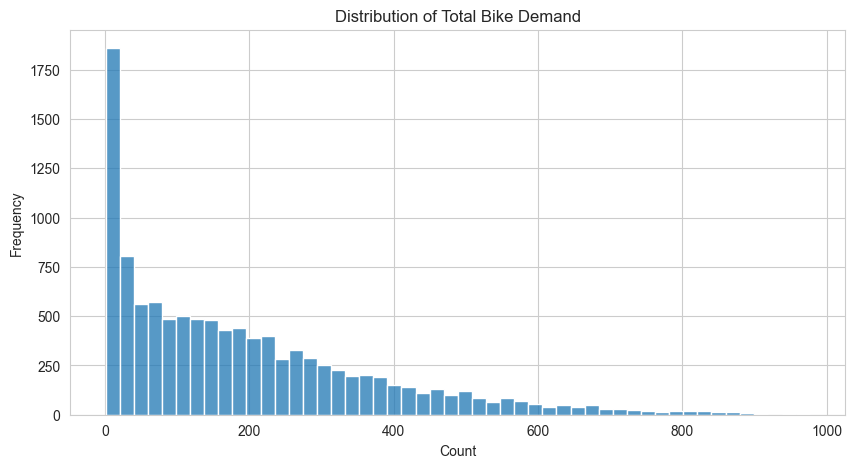

In [16]:
# Cell 7: Target distribution
plt.figure(figsize=(10,5))
sns.histplot(train["count"], bins=50)
plt.title("Distribution of Total Bike Demand")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


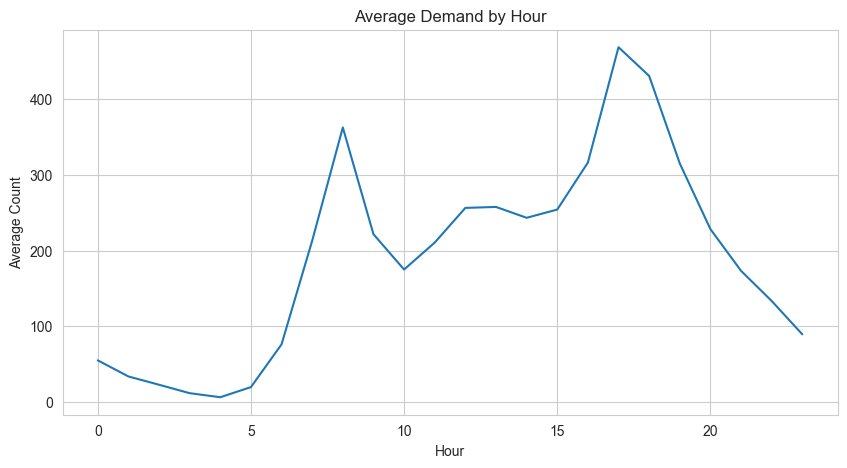

In [17]:
# Cell 8: Demand by hour
hourly = train.groupby("hour")["count"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly.values)
plt.title("Average Demand by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Count")
plt.show()


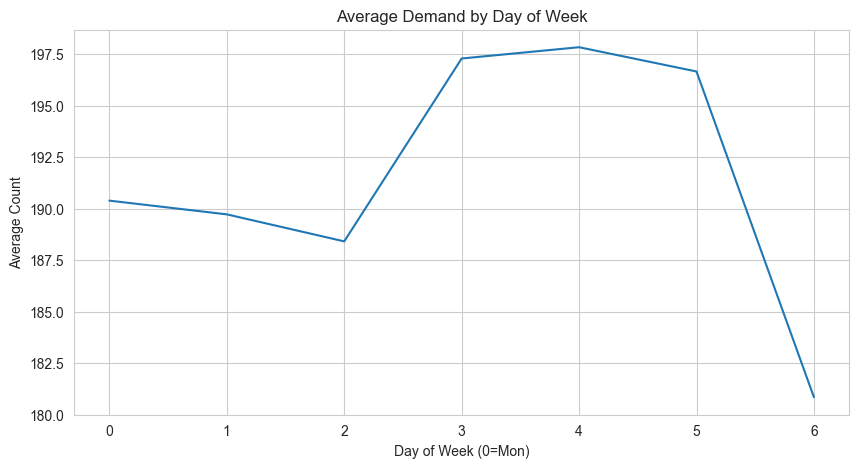

In [18]:
# Cell 9: Demand by day of week
dow = train.groupby("dayofweek")["count"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=dow.index, y=dow.values)
plt.title("Average Demand by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Average Count")
plt.show()


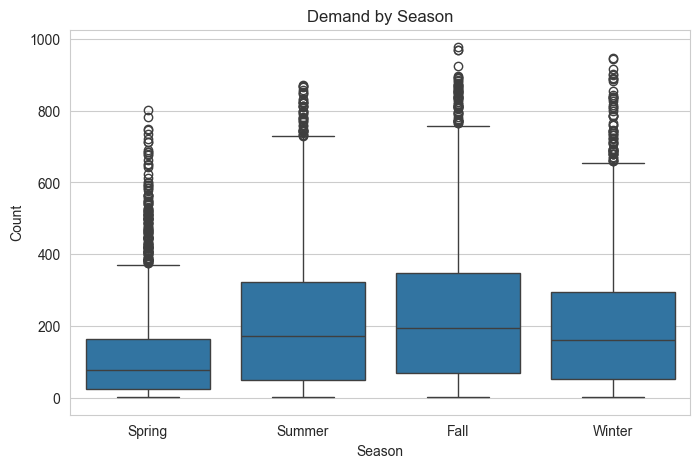

In [19]:
# Cell 10: Demand by season
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
train["season_name"] = train["season"].map(season_map)

plt.figure(figsize=(8,5))
sns.boxplot(x="season_name", y="count", data=train)
plt.title("Demand by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


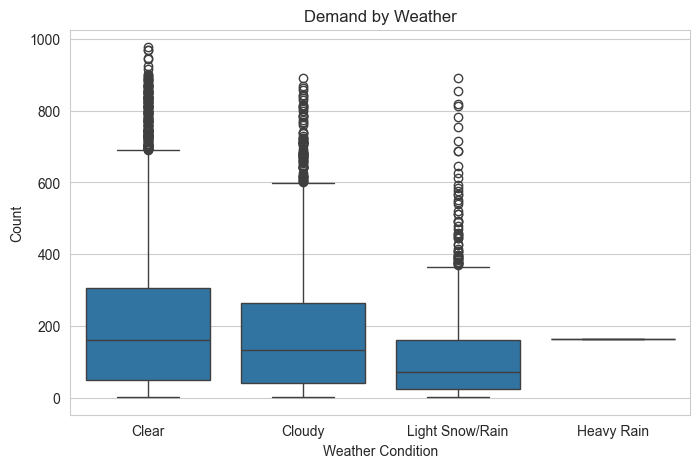

In [20]:
# Cell 11: Demand by weather
weather_map = {
    1: "Clear",
    2: "Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain"
}
train["weather_name"] = train["weather"].map(weather_map)

plt.figure(figsize=(8,5))
sns.boxplot(x="weather_name", y="count", data=train)
plt.title("Demand by Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()


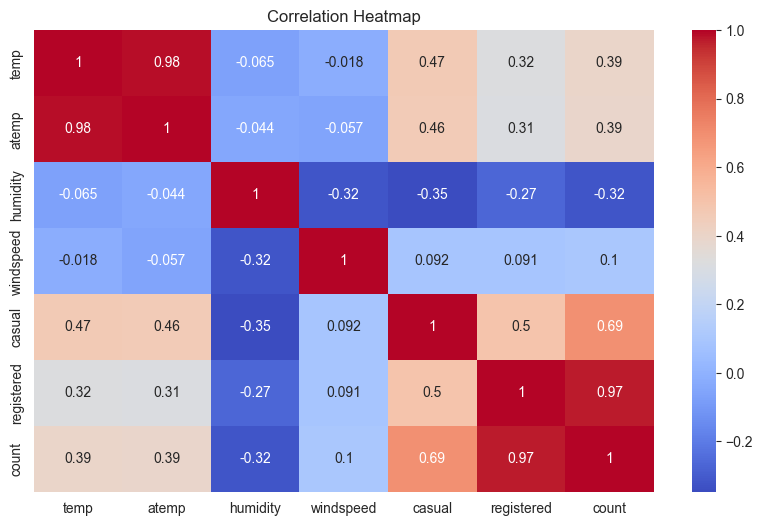

In [21]:
# Cell 12: Correlation heatmap
num_cols = ["temp","atemp","humidity","windspeed","casual","registered","count"]

plt.figure(figsize=(10,6))
sns.heatmap(train[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
# Cell 13: Save processed file
train.to_csv(PROCESSED_DIR / "train_processed.csv", index=False)
test.to_csv(PROCESSED_DIR / "test_processed.csv", index=False)

print("✅ Processed datasets saved!")


✅ Processed datasets saved!
